In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import csv file containing information on images in database, located in different drive.

In [29]:
df=pd.read_csv(r"D:\Documents\BrainStation\Capstone\all_data_info.csv")

In [30]:
df.info()     #get initial idea of data types and null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103250 entries, 0 to 103249
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   artist        103250 non-null  object 
 1   date          76887 non-null   object 
 2   genre         101996 non-null  object 
 3   pixelsx       103250 non-null  float64
 4   pixelsy       103250 non-null  float64
 5   size_bytes    103250 non-null  float64
 6   source        103083 non-null  object 
 7   style         102264 non-null  object 
 8   title         103128 non-null  object 
 9   artist_group  103250 non-null  object 
 10  in_train      103250 non-null  bool   
 11  new_filename  103250 non-null  object 
dtypes: bool(1), float64(3), object(8)
memory usage: 8.8+ MB


In [31]:
df.head()

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
0,Barnett Newman,1955.0,abstract,15530.0,6911.0,9201912.0,wikiart,Color Field Painting,Uriel,train_only,True,102257.jpg
1,Barnett Newman,1950.0,abstract,14559.0,6866.0,8867532.0,wikiart,Color Field Painting,Vir Heroicus Sublimis,train_only,True,75232.jpg
2,kiri nichol,2013.0,NaN,9003.0,9004.0,1756681.0,NaN,Neoplasticism,NaN,test_only,False,32145.jpg
3,kiri nichol,2013.0,NaN,9003.0,9004.0,1942046.0,NaN,Neoplasticism,NaN,test_only,False,20304.jpg
4,kiri nichol,2013.0,NaN,9003.0,9004.0,1526212.0,NaN,Neoplasticism,NaN,test_only,False,836.jpg


In [32]:
df=df.drop(df[df['style'].isna()].index)  #Drop images with no valid style, a small fraction of all data and unworkable for classifier.

Further filtering of images, remove images above certain pixel size which was shown as warning threshold while reading them in, similarly remove very large size images. 

In [33]:
df['pixels']=df['pixelsx']*df['pixelsy']               #Calculate total pixels
df=df.drop(df[df['pixels']>89478485].index)             #Drop images with too many pixels from consideration
df=df.drop(df[df['size_bytes']>6.0e7].index)          #Drop images with very large sizes from consideration

In [35]:
df=df[df['in_train']==True]   #Keep only training set images, don't make seperate dataframe to save memory

In [36]:
df    #Check trimmed dataframe

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename,pixels
5,Tosa Mitsuoki,NaN,mythological painting,25528.0,3000.0,10496349.0,wikiart,Yamato-e,Night March of a Hundred Demons (left half),train_only,True,29855.jpg,76584000.0
6,Barnett Newman,NaN,abstract,7345.0,8640.0,6383948.0,wikiart,Color Field Painting,"Who’s Afraid of Red, Yellow and Blue II",train_only,True,62252.jpg,63460800.0
8,Barnett Newman,1963.0,abstract,6049.0,8206.0,1135960.0,wikiart,Color Field Painting,Black Fire I,train_only,True,63861.jpg,49638094.0
10,Hiroshige,1844,bird-and-flower painting,5492.0,8283.0,10736273.0,wikiart,Ukiyo-e,Camellia and Bush Warbler,train_and_test,True,53180.jpg,45490236.0
11,Wolfgang Paalen,1937.0,landscape,5331.0,8351.0,1407667.0,wikiart,Surrealism,Forbidden Land,train_only,True,70944.jpg,44519181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Tihamer Gyarmathy,1957.0,abstract,316.0,475.0,89274.0,wikiart,Abstract Art,Structures and Signs,train_and_test,True,36690.jpg,150100.0
103244,Anne Ryan,1954.0,NaN,534.0,281.0,54145.0,wikiart,Abstract Expressionism,Number 547,train_only,True,23862.jpg,150054.0
103245,Jackson Pollock,1948.0,abstract,682.0,220.0,96405.0,wikiart,Action painting,Number 13A (Arabesque),train_and_test,True,25525.jpg,150040.0
103246,Bernardo Strozzi,NaN,religious painting,329.0,456.0,127594.0,wikiart,Baroque,St. Francis of Assisi,train_only,True,47038.jpg,150024.0


Visualize distributions of art styles

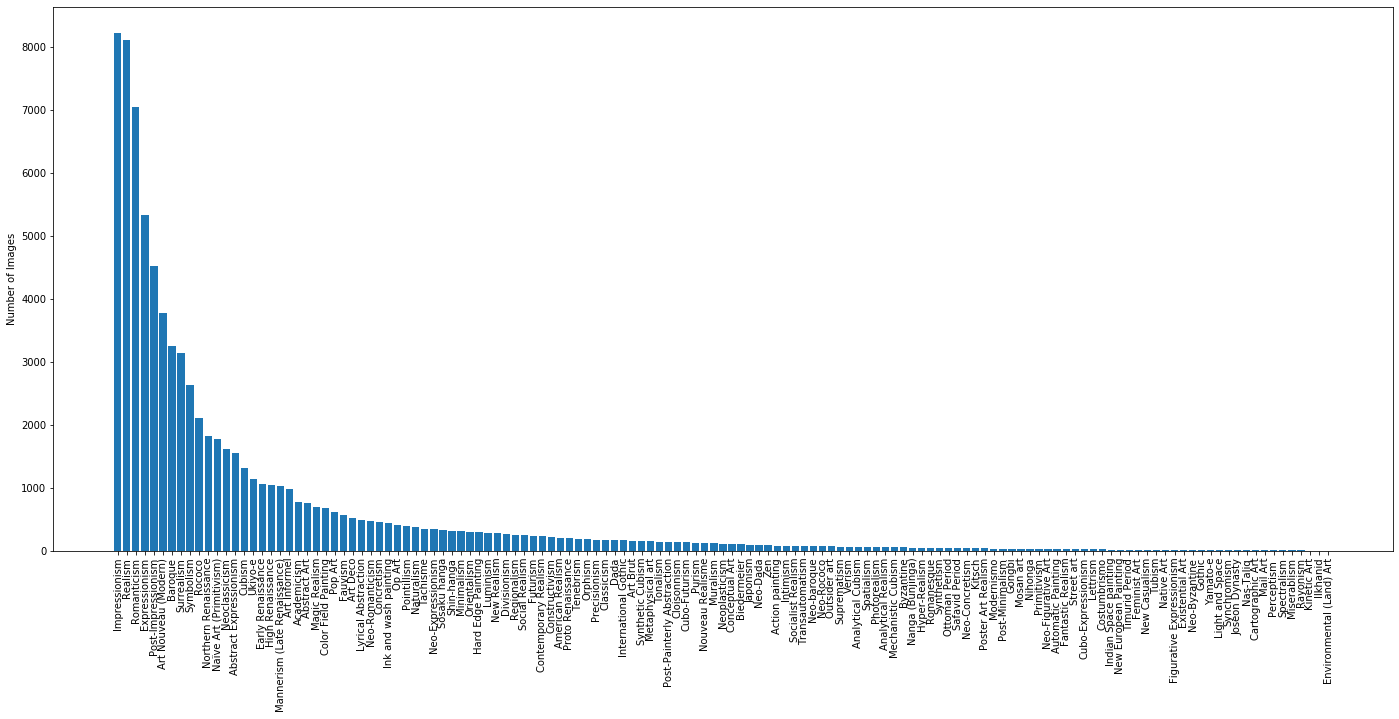

In [37]:
plt.figure(figsize=(24,10))  #Increase size to fit in large number of classes
plt.bar(df['style'].value_counts().index, df['style'].value_counts())   #Value counts of each unique entry in 'style' column
plt.ylabel('Number of Images')
plt.xticks(rotation=90)   #Make class labels legible
plt.show()

As can be seen, extremely imbalanced data with a long tail for the distribution among classes. Those in the tail are likely not useful for image training, with over half the styles seeming to have under 500 example imiages. Therefore, restrict to top 20 sytles by number of images (also make number of target classes more manageable).

In [38]:
num_classes=20
styles=df['style'].value_counts() #value_counts already sorts by descending by default
styles.head(num_classes)

Impressionism                   8220
Realism                         8112
Romanticism                     7041
Expressionism                   5325
Post-Impressionism              4527
Art Nouveau (Modern)            3779
Baroque                         3254
Surrealism                      3133
Symbolism                       2626
Rococo                          2101
Northern Renaissance            1824
Naïve Art (Primitivism)         1776
Neoclassicism                   1622
Abstract Expressionism          1546
Cubism                          1316
Ukiyo-e                         1137
Early Renaissance               1052
High Renaissance                1050
Mannerism (Late Renaissance)    1025
Art Informel                     987
Name: style, dtype: int64

Visualize top 20 classes

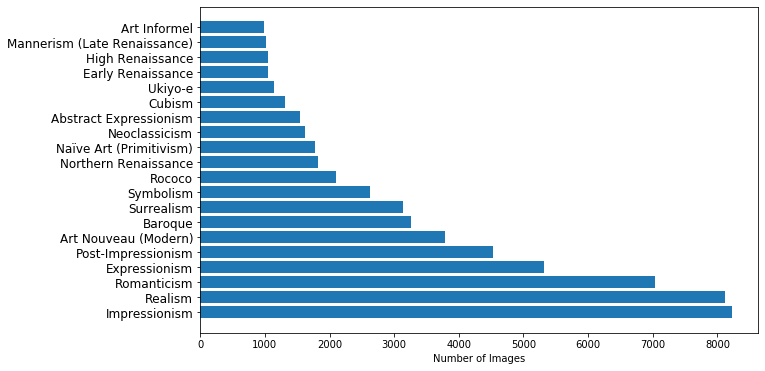

In [39]:
plt.figure(figsize=(10,6))
plt.barh(styles.head(20).index, styles.head(20)) 
plt.yticks(fontsize=12)
plt.xlabel('Number of Images')
plt.show()

There is still quite a strong imbalance. Furthermore, using all examples of the three highest classes will require over 7000 images to be read in and processed for each. Therefore, it seems it is better to take a fixed size sample from each class, under 1000 images in class sample. 

Get example images from each class:

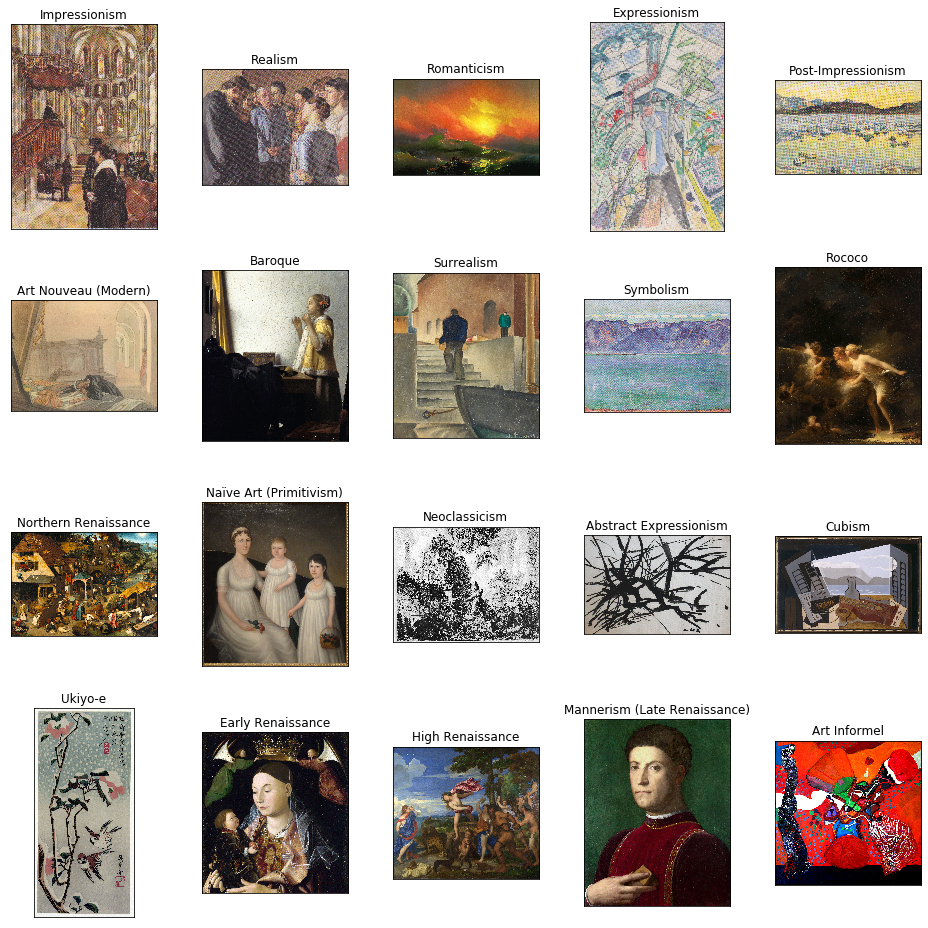

In [42]:
names = df['style'].value_counts().head(20).index  #Get names of each class

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(13, 13))        #Canvas area for plotting
ax = ax.flatten()

for i,style in enumerate(names):
    filname=df[df['style']==style].iloc[4]['new_filename']      #Extract file name from dataframe column and load fourth example of the style class 
    path=r'D:\Documents\BrainStation\Capstone\train\\'             #File path to images on local drive
    path=path+filname
    image=plt.imread(path)                                     #Read in image from file
    ax[i].imshow(image)                                        #Display image
    
    # Set the title of the subplot
    ax[i].set_title(style)                       #affix name
    
    # Hide the x and y ticks
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
    

#fig.suptitle("Classification Labels", size = 20)
fig.tight_layout()

As can be seen, some styles seem easily distinguishable with distinctive characterisitcs, while others seem very similar and difficult to distinguish to layperson. Several styles are also developments of others in this set (eg. the various renaissance styles, impressionsin and post-impressionism). This can make it potentially challenging to seperate them.

Next, kooking at distribution of top 20 artists, the other major distinguishing characterisitc of painting. 

In [57]:
df=pd.read_csv(r"D:\Documents\BrainStation\Capstone\all_data_info.csv")   #Read in again to only filter null values of artist column instead of style as before. 
df=df.drop(df[df['artist'].isna()].index)            #Redo all filtering operations as before
df['pixels']=df['pixelsx']*df['pixelsy']
df=df.drop(df[df['pixels']>89478485].index)
df=df.drop(df[df['size_bytes']>5.4e7].index) 
df=df[df['in_train']==True]

num_classes=20                               #Get top 20 artists by class again. Go straight to 20 as having increasing number of classes increases modelling difficulty. 
artists=df['artist'].value_counts()
artists.head(num_classes)

Paul Cezanne                  412
Giovanni Battista Piranesi    402
Martiros Saryan               399
Ilya Repin                    397
Camille Pissarro              393
Vincent van Gogh              392
Theophile Steinlen            389
Boris Kustodiev               388
Pyotr Konchalovsky            388
Pierre-Auguste Renoir         388
Eugene Boudin                 387
Gustave Dore                  387
Camille Corot                 387
Edgar Degas                   387
Henri Matisse                 384
Albrecht Durer                383
Claude Monet                  383
Ivan Aivazovsky               378
Pablo Picasso                 377
John Singer Sargent           377
Name: artist, dtype: int64

Visualize distribution of top 20 artists classes: 

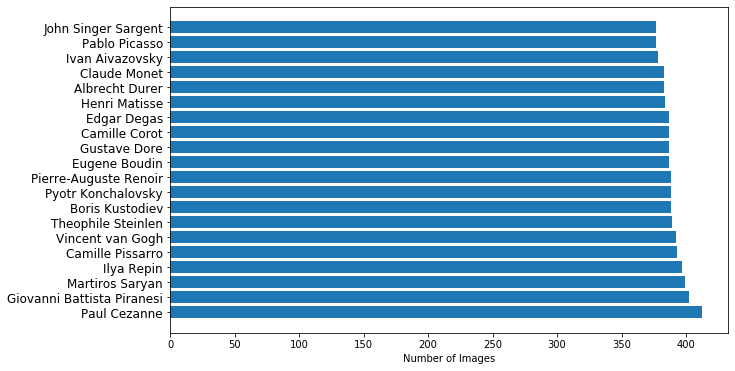

In [47]:
plt.figure(figsize=(10,6))
plt.barh(artists.head(20).index, artists.head(20)) 
plt.yticks(fontsize=12)
plt.xlabel('Number of Images')
plt.show()

The class imbalance is non-existant for top 20 artists, however the total number of samples is much smaller, with 377 on the lower end. Visualizing examples from each artist class: 

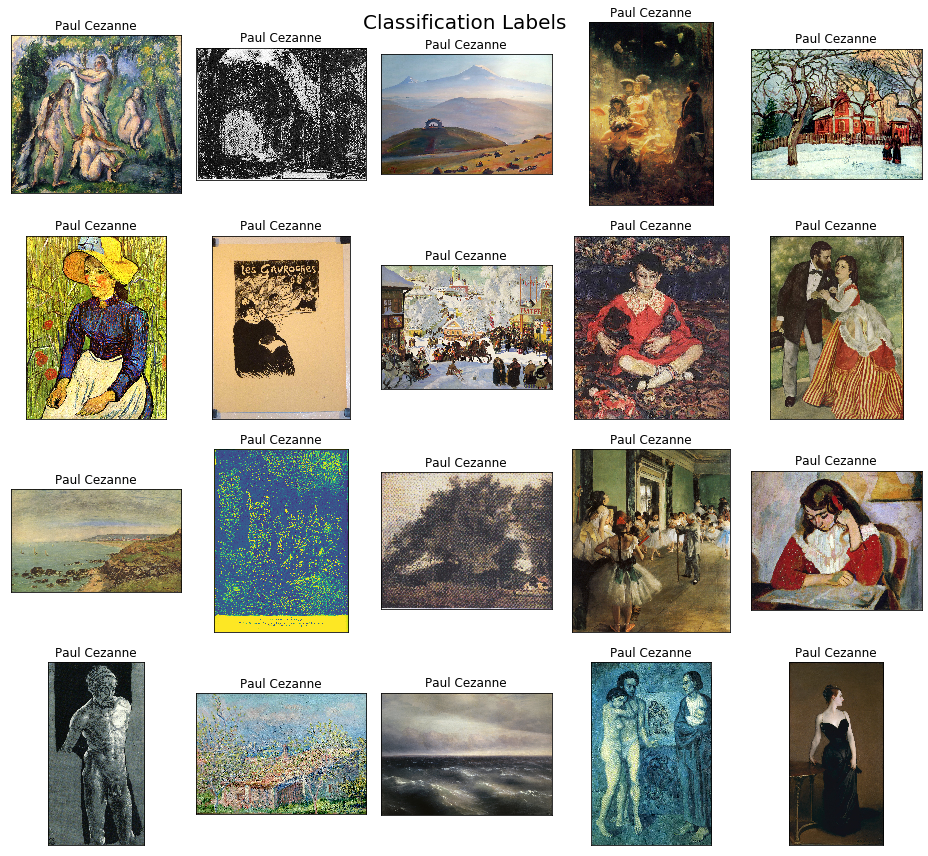

In [48]:
names = df['artist'].value_counts().head(20).index

fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(13, 12))
ax = ax.flatten()

for i,artist in enumerate(names):
    filname=df[df['artist']==artist].iloc[2]['new_filename']
    path=r'D:\Documents\BrainStation\Capstone\train\\'
    path=path+filname
    image=plt.imread(path) 
    ax[i].imshow(image)
    
    # Set the title of the subplot
    ax[i].set_title(style)
    
    # Hide the x and y ticks
    ax[i].set_xticks([]) 
    ax[i].set_yticks([])
    

fig.suptitle("Classification Labels", size = 20)
fig.tight_layout()

As for the style classes, some artists seem easily distinguishable with distinctive style characterisitcs, while others seem very similar and difficult to distinguish to layperson. 